In [1]:
import pandas as pd
from pandas import DataFrame
from sklearn.preprocessing import scale
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 
import os
import csv

In [48]:
# df = pd.read_csv("tot.csv", index_col=None, na_values=['NA'],sep=',',low_memory=False)

cb = pd.read_csv("cb_tot.csv", index_col=None, na_values=['NA'],sep=',',low_memory=False)
bn = pd.read_csv("bn_tot.csv", index_col=None, na_values=['NA'],sep=',',low_memory=False)
q = pd.read_csv("q_tot.csv", index_col=None, na_values=['NA'],sep=',',low_memory=False)

In [5]:
# Settings for seaborn

# sea blues and greens
# sns.set_palette(sns.cubehelix_palette(5, start=1.5, rot=-.75))

# Purple colors (for corpus graphs):
# palette="ch:.25",

# rotating the axis labels 45o
# g.set_xticklabels(rotation=45)

# setting font size:
sns.set(font_scale=1.5)

# sizing for catplot (include as parameter in plot call):
#  height=8.27, aspect=11.7/8.27

# sizing for boxplot:
# fig_dims = (8, 6)
# fig, ax = plt.subplots(figsize=fig_dims)

In [ ]:
df['emb_verb'] = df['emb_verb'].replace({'Agree': 1, 'Disagree': 0})

In [34]:
# for col in q.columns:
#     print(col)

# Look first at the Q data

In [26]:
q = q.loc[q.Type == "trial"]
qq = q.loc[q.Parameter == "Selection"]
# df_q = q.loc[q.Value == "Agree"]

In [60]:
q_ma = qq.loc[qq.study == "q_ma"]
q_maa = q_ma.loc[q_ma.Value == "Agree"]

q_ms = qq.loc[qq.study == "q_ms"]
q_msa = q_ma.loc[q_ma.Value == "Agree"]

q_n = qq.loc[qq.study == "qn"]
q_n = q_n.loc[q_n.WhichQuestion.isin(["Mod","NoMod"])]
q_na = q_n.loc[q_n.Value == "1"]


In [61]:
# q_n['Value'] = q_n['Value'].replace({'Agree': 1, 'Disagree': 0})

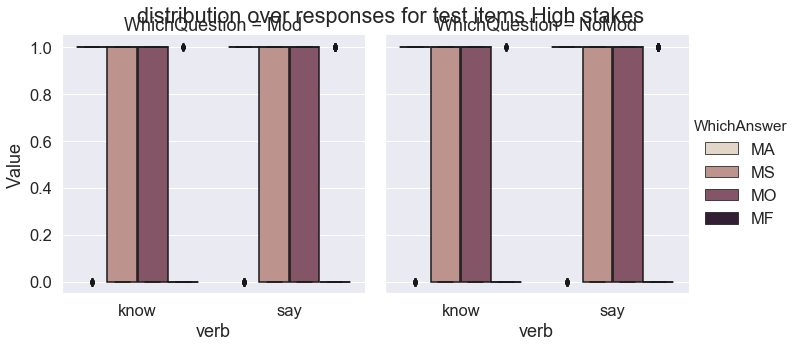

In [52]:
g = sns.catplot(x="verb", y="Value", hue="WhichAnswer", col="WhichQuestion",kind="box", palette="ch:.25", data=q_n)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('distribution over responses for test items No Goal')
plt.show()

In [62]:
none = q_na.pivot_table(index=['WhichAnswer', 'WhichQuestion'], values='Value', aggfunc=len).groupby(["WhichAnswer"]).Value.transform(lambda x: x/len(q_n)).reset_index()

KeyError: 'WhichAnswer'

In [56]:
none

,WhichAnswer,WhichQuestion,Value
0,MA,Mod,0.125
1,MA,NoMod,0.125
2,MF,Mod,0.125
3,MF,NoMod,0.125
4,MO,Mod,0.125
5,MO,NoMod,0.125
6,MS,Mod,0.125
7,MS,NoMod,0.125


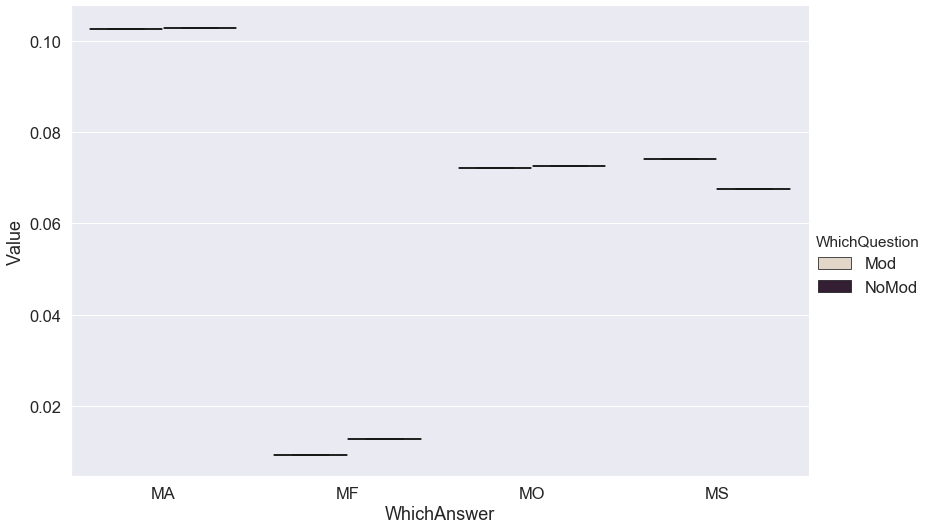

In [46]:
sns.catplot(x="WhichAnswer", y="Value", hue="WhichQuestion", data=tot, kind="box", palette="ch:.25", height=8.27, aspect=11.7/8.27)
plt.subplots_adjust(top=0.9)
plt.show()

In [5]:
df.head()

,Unnamed: 0,Time.results.were.received,MD5.hash.of.participant.s.IP.address,Controller.name,Item.number,Element.number,Type,Group.Ibex,PennElementType,PennElementName,...,SentType,Negation,CompTruth,SubStat,Token,MatchingCategory,MismatchingCategory,Quantifier,Verb,Embedded
0,1,1587043820,3e8f6eb3c615fdc94c6e3456c139539e,PennController,0,0,intro,NaN,PennController,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1587043820,3e8f6eb3c615fdc94c6e3456c139539e,PennController,0,0,intro,NaN,TextInput,ID,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1587043820,3e8f6eb3c615fdc94c6e3456c139539e,PennController,0,0,intro,NaN,TextInput,ID,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1587043820,3e8f6eb3c615fdc94c6e3456c139539e,PennController,0,0,intro,NaN,PennController,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1587043820,3e8f6eb3c615fdc94c6e3456c139539e,PennController,1,0,instructions,NaN,PennController,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Settings for seaborn

# sea blues and greens
# sns.set_palette(sns.cubehelix_palette(5, start=1.5, rot=-.75))

# Purple colors (for corpus graphs):
# palette="ch:.25",

# rotating the axis labels 45o
# g.set_xticklabels(rotation=45)

# setting font size:
sns.set(font_scale=1.5)

# sizing for catplot (include as parameter in plot call):
#  height=8.27, aspect=11.7/8.27

# sizing for boxplot:
# fig_dims = (8, 6)
# fig, ax = plt.subplots(figsize=fig_dims)